In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
missing_values=["N/a","na",np.nan]
df=pd.read_csv('/content/Property_with_Feature_Engineering.csv',na_values=missing_values)
df

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,Very High,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,3,07-24-2019,2019,7,24,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,Medium,I-8,Islamabad,Islamabad Capital,"I-8, Islamabad, Islamabad Capital",...,12.4,3375.91,For Rent,2,07-24-2019,2019,7,24,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,High,G-10,Islamabad,Islamabad Capital,"G-10, Islamabad, Islamabad Capital",...,20.0,5445.02,For Rent,6,07-24-2019,2019,7,24,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,Low,DHA Defence,Islamabad,Islamabad Capital,"DHA Defence, Islamabad, Islamabad Capital",...,2.7,735.08,For Rent,2,07-24-2019,2019,7,24,New National Properties,TALHA MIAN AHMAD


In [3]:
df.shape

(191393, 24)

# Feature Selection

In [4]:
columns_to_drop=['property_id','location_id','page_url','area','area_marla','date_added','agency',
                'agent','price_bin','locality']
df=df.drop(columns=columns_to_drop,axis=1)
df

,property_type,price,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,year,month,day
0,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,32670.12,For Sale,0,2019,7,17
1,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,5445.02,For Sale,5,2018,10,6
2,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,2450.26,For Sale,3,2019,7,3
3,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,5445.02,For Sale,8,2019,4,4
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,2994.76,For Sale,6,2019,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,Upper Portion,70000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,3375.91,For Rent,3,2019,7,24
191389,Upper Portion,40000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,3375.91,For Rent,2,2019,7,24
191390,House,160000,G-10,Islamabad,Islamabad Capital,33.676104,73.013842,6,5445.02,For Rent,6,2019,7,24
191391,Flat,25000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,735.08,For Rent,2,2019,7,24


In [5]:
df.shape

(191393, 14)

In [6]:
df.isnull().sum()

property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area_sqft        0
purpose          0
bedrooms         0
year             0
month            0
day              0
dtype: int64

# Data cleaning

In [8]:
df.shape

(127018, 14)

In [7]:
df = df[df['purpose'] != 'For Rent']

In [ ]:
df.shape

(127018, 14)

<Axes: >

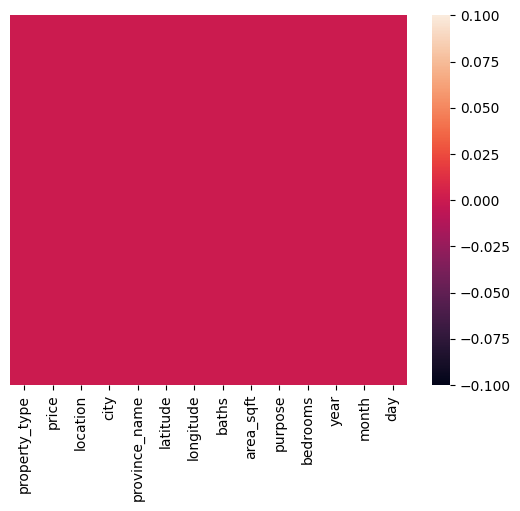

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127018 entries, 0 to 190975
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  127018 non-null  object 
 1   price          127018 non-null  int64  
 2   location       127018 non-null  object 
 3   city           127018 non-null  object 
 4   province_name  127018 non-null  object 
 5   latitude       127018 non-null  float64
 6   longitude      127018 non-null  float64
 7   baths          127018 non-null  int64  
 8   area_sqft      127018 non-null  float64
 9   purpose        127018 non-null  object 
 10  bedrooms       127018 non-null  int64  
 11  year           127018 non-null  int64  
 12  month          127018 non-null  int64  
 13  day            127018 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 14.5+ MB


In [ ]:
df['area_sqrt'].hist(figsize=(15,8))

KeyError: 'area_sqrt'

In [ ]:
marla_mask = df['area_marla'] == "Marla"
df.loc[marla_mask, 'area_size'] *= 25.2929
df.loc[~marla_mask, 'area_size'] *= 505.857
df=df.drop(columns=['area_marla','area_sqrt'],axis=1)
df

KeyError: 'area_size'

# Feature Scaling

In [11]:
print(df['price'].var(),
      df['baths'].var(),
      df['bedrooms'].var(),
      df['area_sqft'].var())

1554440233412674.5 6.549086598180333 3.7425414651230606 20749934497.028305


In [12]:
ep = 1e-10
df['price'] = np.log1p(df['price'] + ep)
df['area_sqft'] = np.log1p(df['area_sqft'] + ep)

<ipython-input-12-7f0c6d3b8480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = np.log1p(df['price'] + ep)
<ipython-input-12-7f0c6d3b8480>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sqft'] = np.log1p(df['area_sqft'] + ep)


In [13]:
df

,property_type,price,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,year,month,day
0,House,19.209138,Model Town,Lahore,Punjab,31.483869,74.325686,0,10.394247,For Sale,0,2019,7,17
1,House,17.504390,Multan Road,Lahore,Punjab,31.431593,74.179980,5,8.602640,For Sale,5,2018,10,6
2,House,16.066802,Eden,Lahore,Punjab,31.499348,74.416959,0,7.804357,For Sale,3,2019,7,3
3,House,18.643824,Gulberg,Lahore,Punjab,31.522069,74.355512,7,8.602640,For Sale,8,2019,4,4
4,House,16.860033,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,8.004953,For Sale,6,2019,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,House,15.096445,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,2,7.216893,For Sale,2,2019,7,24
190972,House,16.648724,G-13,Islamabad,Islamabad Capital,33.650065,72.963681,5,6.993933,For Sale,4,2019,7,24
190973,House,16.636890,G-13,Islamabad,Islamabad Capital,33.650958,72.963030,5,6.993933,For Sale,4,2019,7,24
190974,House,17.092655,G-13,Islamabad,Islamabad Capital,33.650065,72.963681,7,7.686626,For Sale,5,2019,7,24


In [14]:
print(df['price'].var(),
      df['baths'].var(),
      df['bedrooms'].var(),
      df['area_sqft'].var())

1.0132470369634672 6.549086598180333 3.7425414651230606 0.5621134749947879


# Remove outliers

<Axes: ylabel='price'>

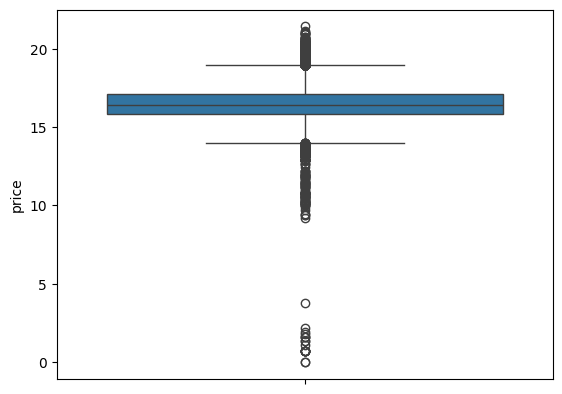

In [15]:
sns.boxplot(df['price'])

<Axes: ylabel='baths'>

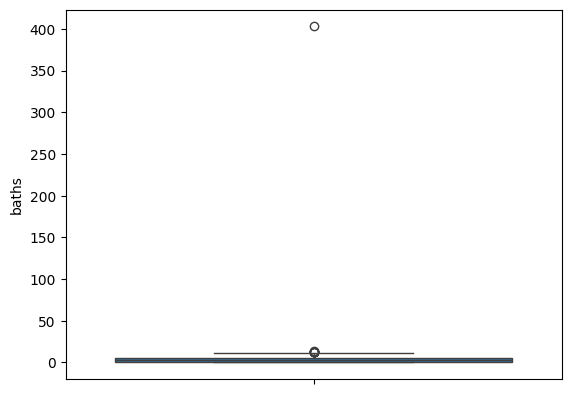

In [16]:
sns.boxplot(df['baths'])

<Axes: ylabel='bedrooms'>

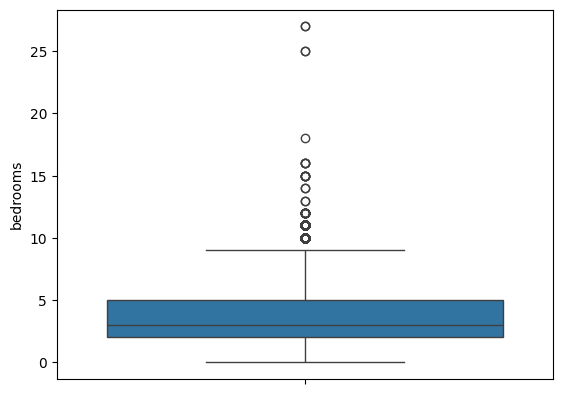

In [17]:
sns.boxplot(df['bedrooms'])

<Axes: ylabel='area_sqft'>

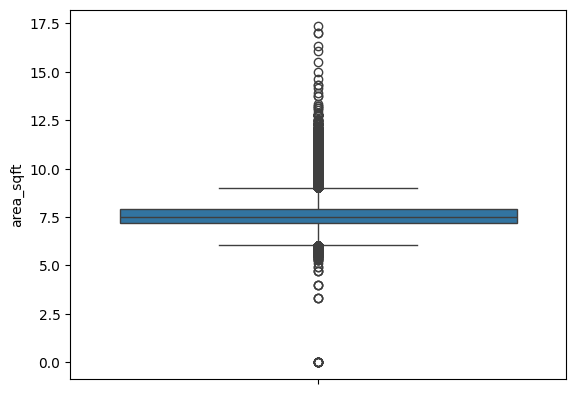

In [18]:
sns.boxplot(df['area_sqft'])

In [19]:
arr=['price','baths','bedrooms','area_sqft']
new_df=df.copy()
for col in arr:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df[col] = np.where(
        new_df[col] > upper_bound,
        upper_bound,
        np.where(
            new_df[col] < lower_bound,
            lower_bound,
            new_df[col]
        )
    )
df = new_df

<Axes: ylabel='bedrooms'>

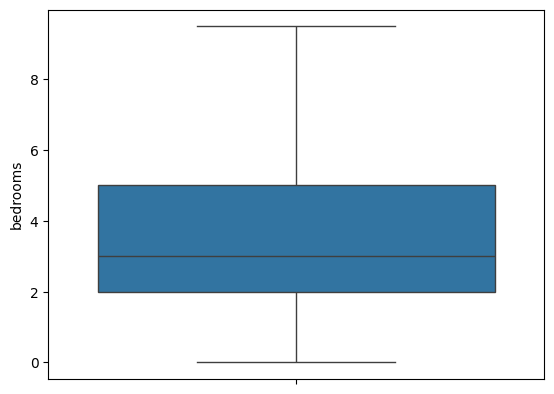

In [20]:
sns.boxplot(df['bedrooms'])

In [21]:
df.shape

(127018, 14)

In [23]:
df.to_csv('data.csv', index=False)

In [22]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


# Encoding Data


In [24]:
import category_encoders as ce

categorical_column=['property_type','location','city','province_name','purpose']
encoder = ce.TargetEncoder(cols=categorical_column)
df_encoded = encoder.fit_transform(df,df['price'])
df_encoded

,property_type,price,location,city,province_name,latitude,longitude,baths,area_sqft,purpose,bedrooms,year,month,day
0,16.680678,18.938397,17.732877,16.609744,16.485471,31.483869,74.325686,0.0,9.010039,16.481723,0.0,2019,7,17
1,16.680678,17.504390,15.750271,16.609744,16.485471,31.431593,74.179980,5.0,8.602640,16.481723,5.0,2018,10,6
2,16.680678,16.066802,16.156779,16.609744,16.485471,31.499348,74.416959,0.0,7.804357,16.481723,3.0,2019,7,3
3,16.680678,18.643824,16.888490,16.609744,16.485471,31.522069,74.355512,7.0,8.602640,16.481723,8.0,2019,4,4
4,16.680678,16.860033,16.590575,16.609744,16.485471,31.506483,74.286017,5.0,8.004953,16.481723,6.0,2019,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190971,16.680678,15.096445,17.361390,16.628531,16.628531,33.492591,73.301339,2.0,7.216893,16.481723,2.0,2019,7,24
190972,16.680678,16.648724,16.837890,16.628531,16.628531,33.650065,72.963681,5.0,6.993933,16.481723,4.0,2019,7,24
190973,16.680678,16.636890,16.837890,16.628531,16.628531,33.650958,72.963030,5.0,6.993933,16.481723,4.0,2019,7,24
190974,16.680678,17.092655,16.837890,16.628531,16.628531,33.650065,72.963681,7.0,7.686626,16.481723,5.0,2019,7,24


In [25]:
X=df_encoded.drop(columns=['price'],axis=1)
y=df['price']

In [26]:
X.columns

Index(['property_type', 'location', 'city', 'province_name', 'latitude',
       'longitude', 'baths', 'area_sqft', 'purpose', 'bedrooms', 'year',
       'month', 'day'],
      dtype='object')

In [27]:
df.drop

<bound method DataFrame.drop of        property_type      price           location       city  \
0              House  18.938397         Model Town     Lahore   
1              House  17.504390        Multan Road     Lahore   
2              House  16.066802               Eden     Lahore   
3              House  18.643824            Gulberg     Lahore   
4              House  16.860033  Allama Iqbal Town     Lahore   
...              ...        ...                ...        ...   
190971         House  15.096445        DHA Defence  Islamabad   
190972         House  16.648724               G-13  Islamabad   
190973         House  16.636890               G-13  Islamabad   
190974         House  17.092655               G-13  Islamabad   
190975         House  17.479072        DHA Defence  Islamabad   

            province_name   latitude  longitude  baths  area_sqft   purpose  \
0                  Punjab  31.483869  74.325686    0.0   9.010039  For Sale   
1                  Punjab  31.431593  74.179980    5.0   8.602640  For Sale   
2                  Punjab  31.499348  74.416959    0.0   7.804357  For Sale   
3                  Punjab  31.522069  74.355512    7.0   8.602640  For Sale   
4                  Punjab  31.506483  74.286017    5.0   8.004953  For Sale   
...                   ...        ...        ...    ...        ...       ...   
190971  Islamabad Capital  33.492591  73.301339    2.0   7.216893  For Sale   
190972  Islamabad Capital  33.650065  72.963681    5.0   6.993933  For Sale   
190973  Islamabad Capital  33.650958  72.963030    5.0   6.993933  For Sale   
190974  Islamabad Capital  33.650065  72.963681    7.0   7.686626  For Sale   
190975  Islamabad Capital  33.526227  73.152981    6.0   7.909677  For Sale   

        bedrooms  year  month  day  
0            0.0  2019      7   17  
1            5.0  2018     10    6  
2            3.0  2019      7    3  
3            8.0  2019      4    4  
4            6.0  2019      4    4  
...          ...   ...    ...  ...  
190971       2.0  2019      7   24  
190972       4.0  2019      7   24  
190973       4.0  2019      7   24  
190974       5.0  2019      7   24  
190975       5.0  2019      7   24  

[127018 rows x 14 columns]>

# Feature Engineering

<Axes: >

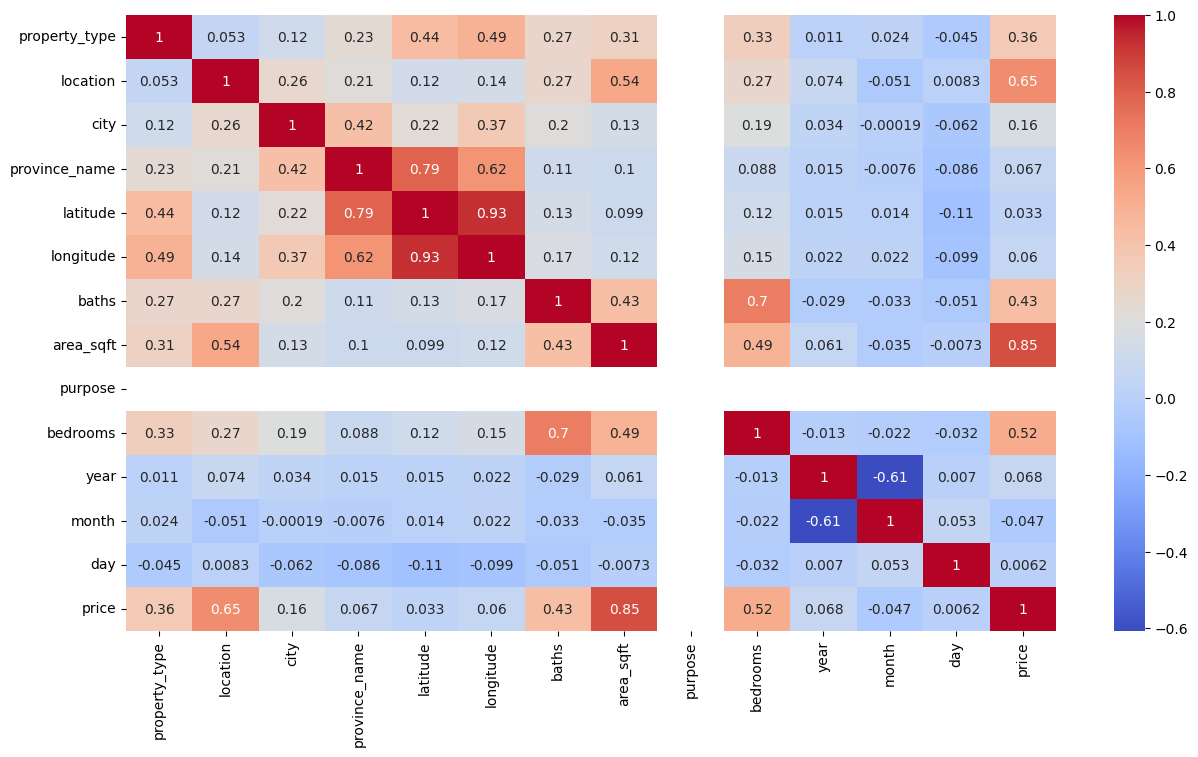

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(X.join(y).corr(),annot=True,cmap='coolwarm')

# Splitting Dataset

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Building Linear model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score

LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [56]:
# Calculate R-squared for train and test
r2_train = LR.score(X_train, y_train)
r2_test = LR.score(X_test, y_test)

# Calculate Mean Squared Error for train and test
mse_train = mean_squared_error(y_train, LR.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error for train and test
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5

print(f"R-squared Train: {r2_train}")
print(f"R-squared Test: {r2_test}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"Root Mean Squared Error Train: {rmse_train}")
print(f"Root Mean Squared Error Test: {rmse_test}")

R-squared Train: 0.8245610638480751
R-squared Test: 0.825566941220677
Mean Squared Error Train: 0.16292580768378842
Mean Squared Error Test: 0.16104490968761068
Root Mean Squared Error Train: 0.40364069131318814
Root Mean Squared Error Test: 0.40130401155185413


Text(0, 0.5, 'Predicted values')

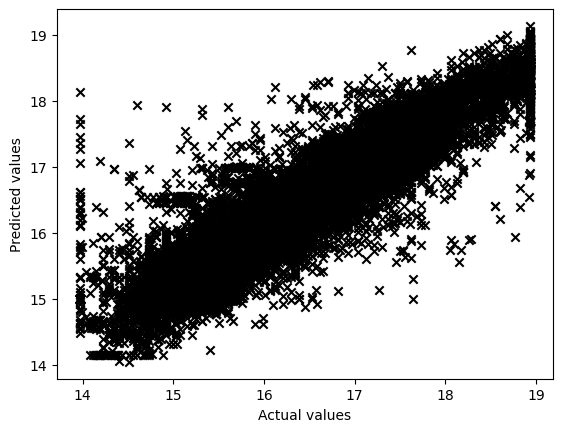

In [32]:
plt.scatter(y_test,y_pred,marker='x',color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

# Score of linear model

In [33]:

m_score_train = LR.score(X_train,y_train)
m_score_test = LR.score(X_test,y_test)
r2 = r2_score(y_test, y_pred)
train_mse_scaled = mean_squared_error(y_train, LR.predict(X_train))
test_mse_scaled = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(test_mse_scaled)

print(f"model_score_train : {m_score_train}\nmodel score_test : {m_score_test}\nR-squared: {r2}\nmean_squared_error_train: {train_mse_scaled}\nmean_square_error_test: {test_mse_scaled}\nrmse : {rmse}")

model_score_train : 0.8245610638480751
model score_test : 0.825566941220677
R-squared: 0.825566941220677
mean_squared_error_train: 0.16292580768378842
mean_square_error_test: 0.16104490968761068
rmse : 0.40130401155185413


# Building Knn model

In [34]:
from sklearn.neighbors import KNeighborsRegressor

Knn=KNeighborsRegressor(n_neighbors=3)
Knn.fit(X_train,y_train)
y_pred_knn=Knn.predict(X_test)

Text(0, 0.5, 'Predicted values')

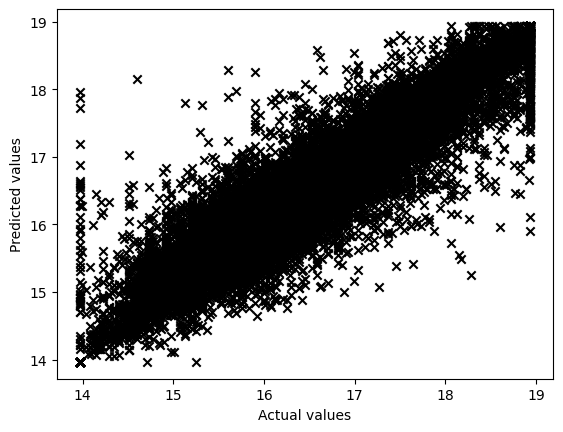

In [35]:
plt.scatter(y_test,y_pred_knn,marker='x',color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

# Score of Knn model

In [55]:

# Calculate R-squared for train and test
r2_train = Knn.score(X_train, y_train)
r2_test = Knn.score(X_test, y_test)

# Calculate Mean Squared Error for train and test
mse_train = mean_squared_error(y_train, Knn.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error for train and test
rmse_train = mse_train**0.5
rmse_test = mse_test**0.5

print(f"R-squared Train: {r2_train}")
print(f"R-squared Test: {r2_test}")
print(f"Mean Squared Error Train: {mse_train}")
print(f"Mean Squared Error Test: {mse_test}")
print(f"Root Mean Squared Error Train: {rmse_train}")
print(f"Root Mean Squared Error Test: {rmse_test}")


R-squared Train: 0.9262918471158249
R-squared Test: 0.8473953297133848
Mean Squared Error Train: 0.06845094142120754
Mean Squared Error Test: 0.14089190154778597
Root Mean Squared Error Train: 0.26163130818234953
Root Mean Squared Error Test: 0.375355700033696


In [54]:
m_score_test_knn=Knn.score(X_test,y_test)
r2_knn = r2_score(y_test, y_pred_knn)
train_mse_scaled_knn = mean_squared_error(y_train, Knn.predict(X_train))
test_mse_scaled_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn=np.sqrt(test_mse_scaled_knn)
print(f"model score_test : {m_score_test_knn}\nR-squared: {r2_knn}\nmean_squared_error_train: {train_mse_scaled_knn}\nmean_square_error_test: {test_mse_scaled_knn}\nrmse : {rmse_knn}")

SyntaxError: unterminated string literal (detected at line 6) (<ipython-input-54-9c0491bab055>, line 6)

# Comapring between mse

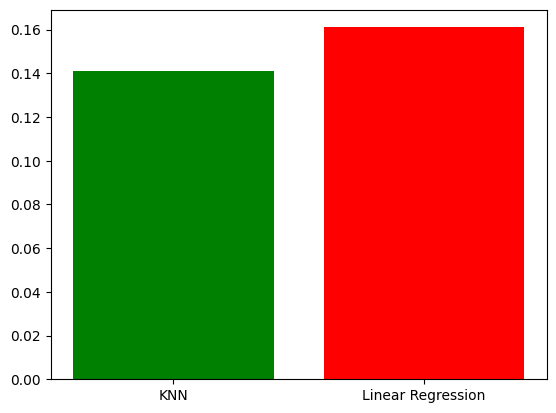

In [39]:
labels = ['KNN','Linear Regression']
total_mse = [test_mse_scaled_knn,test_mse_scaled]
plt.bar(labels,total_mse,color=['green','red'])
plt.show()

# Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

# Linear Regression Model
LR_cv = cross_val_score(LR,X,y,cv=5,scoring="r2")
LR_cv = LR_cv.mean()


# KNN Model
Knn_cv = cross_val_score(Knn,X,y,cv=5,scoring="r2")
Knn_cv = Knn_cv.mean()

#printing the results of cv_models
print(f'Linear Regression Score: {LR_cv}')
print(f'KNN Score: {Knn_cv}')

# the results is very near to results before we do cross validation this indicates that the model is stable and generalize well to unseen data

Linear Regression Score: -69301.58310928458
KNN Score: 0.75428114064226


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)

print("Linear Regression:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)

# KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print("\nKNN:")
print("MSE:", mse_knn)
print("MAE:", mae_knn)


Linear Regression:
MSE: 0.16104490968761068
MAE: 0.2873873163735487

KNN:
MSE: 0.14089190154778597
MAE: 0.2480427381637221


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gradient_boost_model = GradientBoostingRegressor(learning_rate=1.0, n_estimators=20, max_depth=5, min_samples_leaf=5)

# Fit the model
gradient_boost_model.fit(X_train, y_train)

# Predictions
y_train_pred = gradient_boost_model.predict(X_train)
y_test_pred = gradient_boost_model.predict(X_test)

# Model scores
model_score_train = gradient_boost_model.score(X_train, y_train)
model_score_test = gradient_boost_model.score(X_test, y_test)

# R-squared scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

# Mean squared errors
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root mean squared errors
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print("Model Score Train:", model_score_train)
print("Model Score Test:", model_score_test)
print("R-squared Train:", r2_score_train)
print("R-squared Test:", r2_score_test)
print("Mean Squared Error Train:", mse_train)
print("Mean Squared Error Test:", mse_test)
print("Root Mean Squared Error Train:", rmse_train)
print("Root Mean Squared Error Test:", rmse_test)


Model Score Train: 0.905365900293386
Model Score Test: 0.8985032287237333
R-squared Train: 0.905365900293386
R-squared Test: 0.8985032287237333
Mean Squared Error Train: 0.08788435148612869
Mean Squared Error Test: 0.09370665445045798
Root Mean Squared Error Train: 0.2964529498691634
Root Mean Squared Error Test: 0.3061154266783332


In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

adaboost_model = AdaBoostRegressor(n_estimators=20, learning_rate=0.1, loss='square')

# Fit the model
adaboost_model.fit(X_train, y_train)

# Predictions
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Model scores
model_score_train = adaboost_model.score(X_train, y_train)
model_score_test = adaboost_model.score(X_test, y_test)

# R-squared scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

# Mean squared errors
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root mean squared errors
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print("Model Score Train:", model_score_train)
print("Model Score Test:", model_score_test)
print("R-squared Train:", r2_score_train)
print("R-squared Test:", r2_score_test)
print("Mean Squared Error Train:", mse_train)
print("Mean Squared Error Test:", mse_test)
print("Root Mean Squared Error Train:", rmse_train)
print("Root Mean Squared Error Test:", rmse_test)

Model Score Train: 0.7567482335101365
Model Score Test: 0.7553144602570372
R-squared Train: 0.7567482335101365
R-squared Test: 0.7553144602570372
Mean Squared Error Train: 0.22590190863645684
Mean Squared Error Test: 0.22590534687362115
Root Mean Squared Error Train: 0.4752913933961532
Root Mean Squared Error Test: 0.47529501036053506


In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Model scores
model_score_train = xgb_model.score(X_train, y_train)
model_score_test = xgb_model.score(X_test, y_test)

# R-squared scores
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

# Mean squared errors
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root mean squared errors
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the metrics
print("Model Score Train:", model_score_train)
print("Model Score Test:", model_score_test)
print("R-squared Train:", r2_score_train)
print("R-squared Test:", r2_score_test)
print("Mean Squared Error Train:", mse_train)
print("Mean Squared Error Test:", mse_test)
print("Root Mean Squared Error Train:", rmse_train)
print("Root Mean Squared Error Test:", rmse_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:44:50] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model Score Train: 0.9350542663337602
Model Score Test: 0.9210336445526395
R-squared Train: 0.9350542663337602
R-squared Test: 0.9210336445526395
Mean Squared Error Train: 0.06031349907426027
Mean Squared Error Test: 0.0729055012299503
Root Mean Squared Error Train: 0.24558806785807055
Root Mean Squared Error Test: 0.2700101872706849
